# IGTI - Bootcamp - Cientista de Dados

## Trabalho Prático 1

Autor: Leonardo Simões

### Perguntas

1 - Qual o objetivo do algoritmo K-Means? 

2 - O algoritmo K-Means é baseado em qual tipo de aprendizagem?

3 - Considerando o dataset gerado a partir das instruções do enunciado, qual das imagens representa o gráfico correto? 

4 - Caso o algoritmo K-Means seja executado buscando apenas 1 cluster, qual será a coordenada do centroide ao final da execução? 

5 - Caso o algoritmo seja executado buscando apenas 1 cluster, qual será a soma dos quadrados intra-clusters (wcss) ao final da execução? 

6 -  Caso o algoritmo seja executado buscando 5 clusters, qual será a soma dos quadrados intra-clusters (wcss) ao final da execução? 

7 -  Caso o algoritmo seja executado buscando 5 clusters, qual será a soma dos quadrados intra-clusters (wcss) ao final da execução? 

8 - Ao criar um gráfico com as medidas “Confirmed”, “Deaths”, “Recovered” e “Active” apenas para a China (Mainland China), como fica o gráfico? 

9 - Filtre por país, selecionando a Itália (Italy), analise as informações do dataset e responda: Em que mês o país passou a ter mais casos recuperados do que casos ativos? 

10 - Filtre por país, selecionando a Coreia do Sul (South Korea). Em que mês esse país atingiu o pico de casos ativos?

11 - Ao criar um gráfico com a medida “Active” apenas para a Itália (Italy), como fica o gráfico? 

12 - Filtre por país, selecionando a Venezuela, analise as informações, perceba que algumas vezes o número de casos recuperados foi maior que o de casos ativos. Em que mês isso ocorreu pela primeira vez? 

### Desenvolvimento - Parte 1

    1) Qual o objetivo do algoritmo K-Means?
    R: Clusterização

    2) O algoritmo K-Means é baseado em qual tipo de aprendizagem?
    R:  Não supervisionada

In [1]:
from math import sqrt
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

    3) Considerando o dataset gerado a partir das instruções do enunciado, qual das imagens representa o gráfico correto? 

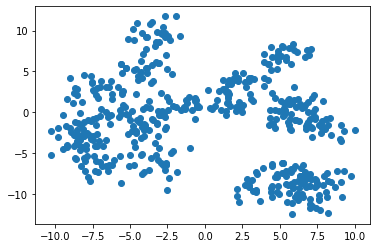

In [2]:
X, y = make_blobs(n_samples=500, centers=20, random_state=999)
plt.scatter(X[:,0], X[:,1]);

In [3]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 1, wcss[0]
    x2, y2 = 19, wcss[len(wcss)-1]
    distances = []
    for i in range(len(wcss)):
        x0 = i + 1
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 1

In [4]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
n = optimal_number_of_clusters(wcss)
print(n)

4


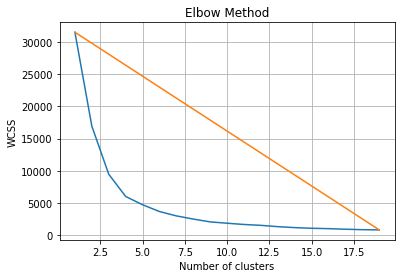

In [5]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.plot([1, 19],[wcss[0], wcss[len(wcss)-1]])
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()

     4) Caso o algoritmo K-Means seja executado buscando apenas 1 cluster, qual será a coordenada do centroide ao final da execução?

In [6]:
kmeans1 = KMeans(n_clusters=1, init='k-means++', max_iter=300, n_init=10)
kmeans1.fit(X)
labels = kmeans1.predict(X)
labels
kmeans1.cluster_centers_ 

array([[ 0.02618523, -1.30384304]])

    5) Caso o algoritmo seja executado buscando apenas 1 cluster, qual será a soma dos quadrados intra-clusters (wcss) ao final da execução? 

In [7]:
kmeans1.inertia_

31547.372471390485

    6) Caso o algoritmo seja executado buscando 5 clusters, qual será a soma dos quadrados intra-clusters (wcss) ao final da execução? 

In [8]:
wcss[4]

4717.404091931214

    7) Qual o número ideal de clusters? 

In [9]:
optimal_number_of_clusters(wcss)

4

### Desenvolvimento - Parte 2

In [11]:
import pandas as pd
import numpy as np

In [26]:
df = pd.read_csv('covid_19_data.csv', parse_dates=True, squeeze=True)
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


Crie uma “Nova Medida” chamada “Active” para calcular o número de casos ativos, que é no caso é o valor da coluna
“Confirmed” menos a soma das colunas “Recovered” e “Deaths”. Crie gráficos para facilitar a sua visualização de acordo com a questão.

In [27]:
df['Active'] = df['Confirmed'] - (df['Recovered'] + df['Deaths'])

In [28]:
df.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered', 'Active'],
      dtype='object')

In [29]:
is_china = df['Country/Region'].str.lower().str.endswith("china") 
df_china = df[is_china]
df_china.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Active
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,1.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0,14.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0,6.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,1.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0,0.0


    8) Utilizando o Power BI e o dataset das instruções do enunciado. Ao criar um gráfico com as medidas “Confirmed”, “Deaths”, “Recovered” e “Active” apenas para a China (Mainland China), como fica o gráfico? 

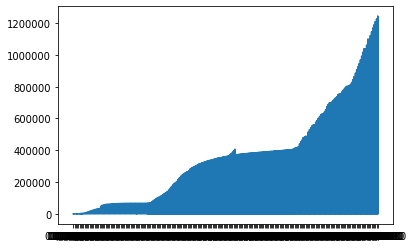

In [35]:
plt.plot(df['ObservationDate'], df['Confirmed']);

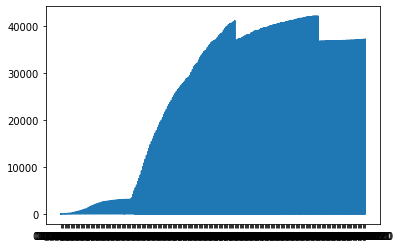

In [36]:
plt.plot(df['ObservationDate'], df['Deaths']);

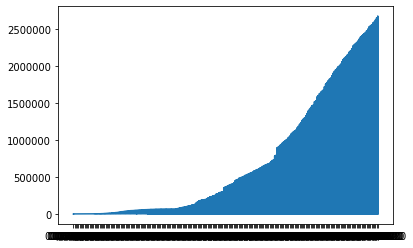

In [37]:
plt.plot(df['ObservationDate'], df['Recovered']);

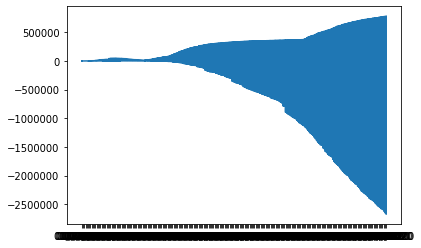

In [38]:
plt.plot(df['ObservationDate'], df['Active']);

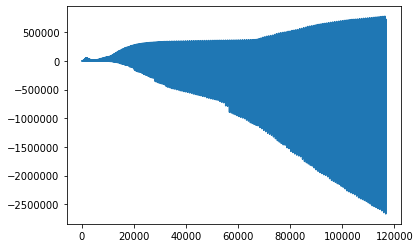

In [39]:
plt.plot(df['Active']);

    9) Filtre por país, selecionando a Itália (Italy), analise as informações do dataset e responda: Em que mês o país passou a ter mais casos recuperados do que casos ativos? 

In [40]:
df['Country/Region'].value_counts()

US                 12356
Russia              9667
Mainland China      7624
Japan               5907
Mexico              4147
                   ...  
East Timor             1
St. Martin             1
Channel Islands        1
 Azerbaijan            1
North Ireland          1
Name: Country/Region, Length: 223, dtype: int64

In [41]:
is_italy = df['Country/Region'].str.lower().str.endswith("italy") 
df_italy = df[is_italy]
df_italy.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Active
480,481,01/31/2020,NaN,Italy,1/31/2020 23:59,2.0,0.0,0.0,2.0
539,540,02/01/2020,NaN,Italy,1/31/2020 8:15,2.0,0.0,0.0,2.0
608,609,02/02/2020,NaN,Italy,2020-01-31T08:15:53,2.0,0.0,0.0,2.0
675,676,02/03/2020,NaN,Italy,2020-01-31T08:15:53,2.0,0.0,0.0,2.0
743,744,02/04/2020,NaN,Italy,2020-01-31T08:15:53,2.0,0.0,0.0,2.0


In [43]:
df_italy.query('Recovered > Active').head(3)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Active
21947,21948,05/06/2020,NaN,Italy,2020-05-07 02:32:28,214457.0,29684.0,93245.0,91528.0
22270,22271,05/07/2020,NaN,Italy,2020-05-08 02:32:32,215858.0,29958.0,96276.0,89624.0
22593,22594,05/08/2020,NaN,Italy,2020-05-09 02:32:35,217185.0,30201.0,99023.0,87961.0


In [44]:
df['ObservationDate']

0         01/22/2020
1         01/22/2020
2         01/22/2020
3         01/22/2020
4         01/22/2020
             ...    
116800    09/23/2020
116801    09/23/2020
116802    09/23/2020
116803    09/23/2020
116804    09/23/2020
Name: ObservationDate, Length: 116805, dtype: object

R: Mês 5 - Maio

    10) Utilizando o Power BI e o dataset das instruções do enunciado. Filtre por país, selecionando a Coreia do Sul (South Korea). Em que mês esse país atingiu o pico de casos ativos? 

In [45]:
is_south_korea = df['Country/Region'].str.lower().str.endswith("south korea") 
df_south_korea = df[is_south_korea]
df_south_korea.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Active
37,38,01/22/2020,NaN,South Korea,1/22/2020 17:00,1.0,0.0,0.0,1.0
75,76,01/23/2020,NaN,South Korea,1/23/20 17:00,1.0,0.0,0.0,1.0
121,122,01/24/2020,NaN,South Korea,1/24/20 17:00,2.0,0.0,0.0,2.0
162,163,01/25/2020,NaN,South Korea,1/25/20 17:00,2.0,0.0,0.0,2.0
208,209,01/26/2020,NaN,South Korea,1/26/20 16:00,3.0,0.0,0.0,3.0


In [46]:
df_south_korea.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246 entries, 37 to 116203
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              246 non-null    int64  
 1   ObservationDate  246 non-null    object 
 2   Province/State   0 non-null      object 
 3   Country/Region   246 non-null    object 
 4   Last Update      246 non-null    object 
 5   Confirmed        246 non-null    float64
 6   Deaths           246 non-null    float64
 7   Recovered        246 non-null    float64
 8   Active           246 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 19.2+ KB


In [51]:
df_south_korea['mes_ano'] = pd.to_datetime(df_south_korea['ObservationDate']).dt.to_period('M')
df_south_korea['mes_ano']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


37        2020-01
75        2020-01
121       2020-01
162       2020-01
208       2020-01
           ...   
113233    2020-09
113975    2020-09
114717    2020-09
115460    2020-09
116203    2020-09
Name: mes_ano, Length: 246, dtype: period[M]

In [53]:
df3 = df_south_korea.groupby('mes_ano')
df3.max()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Active
mes_ano,,,,,,,,,
2020-01,469,01/31/2020,NaN,South Korea,1/31/2020 23:59,11.0,0.0,0.0,11.0
2020-02,2701,02/29/2020,NaN,South Korea,2020-02-29T18:13:07,3150.0,16.0,27.0,3107.0
2020-03,10506,03/31/2020,NaN,South Korea,3/8/20 5:31,9786.0,162.0,5408.0,7577.0
2020-04,20081,04/30/2020,NaN,South Korea,4/6/20 9:37,10774.0,248.0,9072.0,4155.0
2020-05,32138,05/31/2020,NaN,South Korea,2020-06-01 02:32:46,11503.0,271.0,10422.0,1407.0
2020-06,53341,06/30/2020,NaN,South Korea,2020-07-01 04:33:52,12850.0,282.0,11613.0,1324.0
2020-07,76123,07/31/2020,NaN,South Korea,2020-08-01 04:36:27,14336.0,301.0,13233.0,1005.0
2020-08,99136,08/31/2020,NaN,South Korea,2020-09-01 04:28:31,20182.0,324.0,15198.0,4660.0
2020-09,116204,09/23/2020,NaN,South Korea,2020-09-24 04:23:38,23341.0,393.0,20832.0,4786.0


In [56]:
max(df3.Active.max())

7577.0

R: Mês 3 - Março

    11) Utilizando o Power BI e o dataset das instruções do enunciado. Ao criar um gráfico com a medida “Active” apenas para a Itália (Italy), como fica o gráfico? 

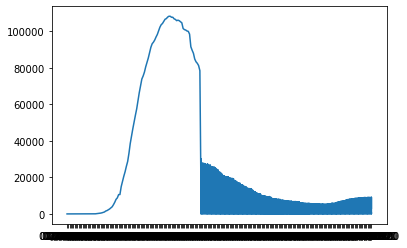

In [48]:
plt.plot(df_italy['ObservationDate'],df_italy['Active'])

    12) Utilizando o Power BI e o dataset das instruções do enunciado. Filtre por país, selecionando a Venezuela, analise as informações, perceba que algumas vezes o número de casos recuperados foi maior que o de casos ativos. Em que mês isso ocorreu pela primeira vez? 

In [49]:
is_venezuela = df['Country/Region'].str.lower().str.endswith("venezuela") 
df_venezuela = df[is_venezuela]
df_venezuela.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Active
5594,5595,03/14/2020,NaN,Venezuela,2020-03-14T12:53:07,2.0,0.0,0.0,2.0
5802,5803,03/15/2020,NaN,Venezuela,2020-03-15T18:20:18,10.0,0.0,0.0,10.0
6053,6054,03/16/2020,NaN,Venezuela,2020-03-16T00:53:03,17.0,0.0,0.0,17.0
6305,6306,03/17/2020,NaN,Venezuela,2020-03-17T11:33:05,33.0,0.0,0.0,33.0
6585,6586,03/18/2020,NaN,Venezuela,2020-03-18T11:33:04,36.0,0.0,0.0,36.0


In [50]:
df_venezuela.query('Recovered > Active').head(3)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Active
13381,13382,04/09/2020,NaN,Venezuela,2020-04-09 23:09:19,171.0,9.0,84.0,78.0
13701,13702,04/10/2020,NaN,Venezuela,2020-04-10 23:01:43,171.0,9.0,84.0,78.0
14022,14023,04/11/2020,NaN,Venezuela,2020-04-11 22:52:46,175.0,9.0,93.0,73.0


R:  Abril